In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dataset with all features

# Checking for missing data

In [2]:
dataset = pd.read_csv('./bankloan.csv')
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

# Data pre processing

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
X

array([[25.,  1., 49., ...,  1.,  0.,  0.],
       [45., 19., 34., ...,  1.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  0.,  1.],
       [28.,  4., 83., ...,  0.,  0.,  1.]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train

array([[ 55.,  31., 159., ...,   0.,   0.,   0.],
       [ 51.,  26., 179., ...,   1.,   0.,   1.],
       [ 63.,  37.,  20., ...,   0.,   0.,   0.],
       ...,
       [ 26.,   1.,  24., ...,   0.,   0.,   0.],
       [ 57.,  33.,  49., ...,   1.,   1.,   1.],
       [ 33.,   9.,  38., ...,   0.,   0.,   0.]])

# Train Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 350, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

# Model evaluation

In [6]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.27114577084583086

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1125,   54],
       [ 398,   90]], dtype=int64)

# Graphs

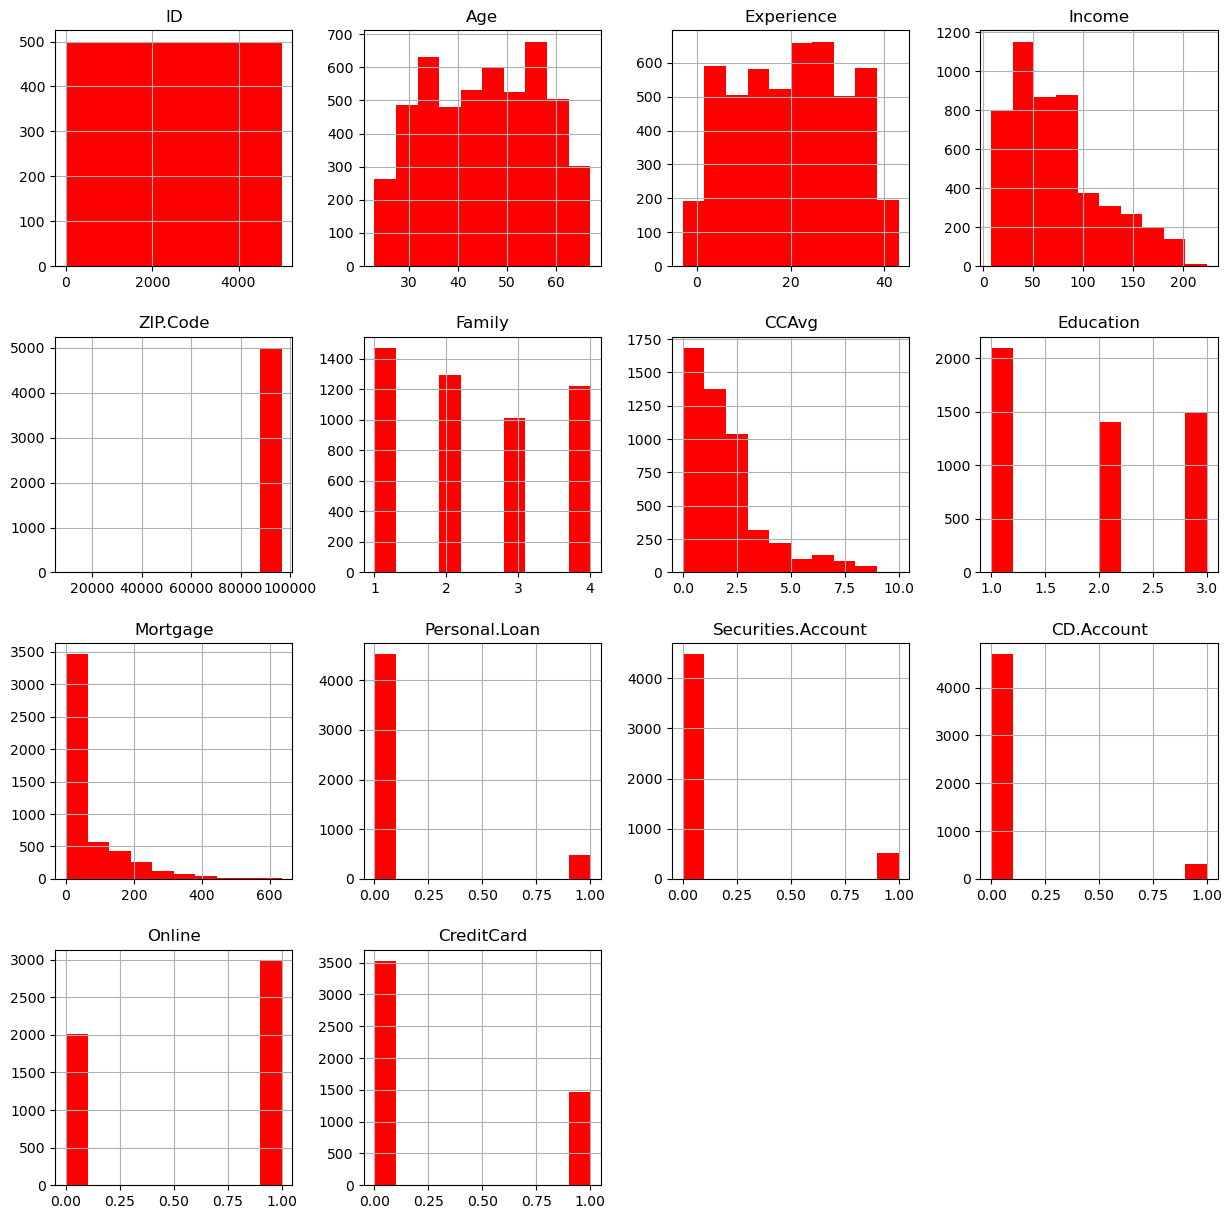

In [8]:
dataset.hist(figsize=(15,15),color = 'red')
plt.show()

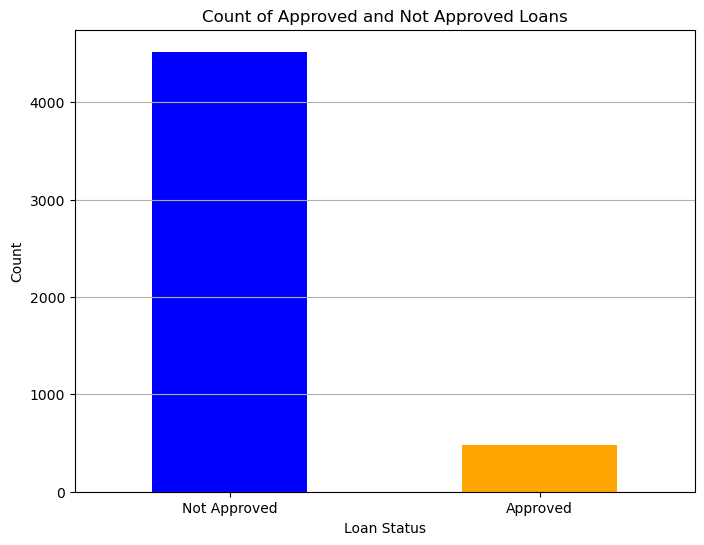

In [9]:
loan_counts = dataset['Personal.Loan'].value_counts()
loan_counts
plt.figure(figsize=(8, 6))
loan_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Approved and Not Approved Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'], rotation=0)
plt.grid(axis='y')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


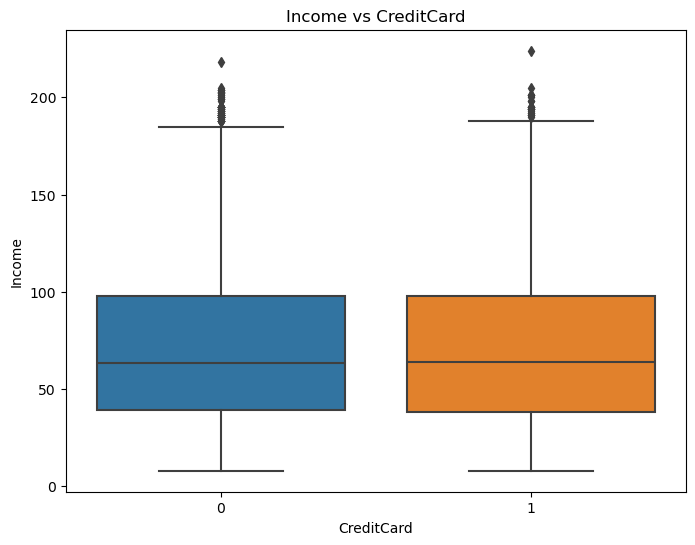

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CreditCard', y='Income', data=dataset)
plt.title('Income vs CreditCard')
plt.xlabel('CreditCard')
plt.ylabel('Income')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


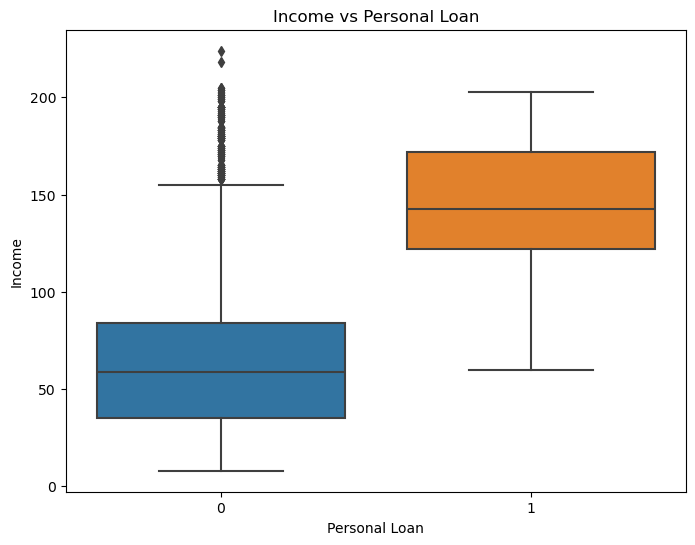

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal.Loan', y='Income', data=dataset)
plt.title('Income vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.show()

# Dataset Without 2nd and 5th col

# Removing 2nd and 5th col

In [12]:
import numpy as np
dataset = pd.read_csv('./bankloan.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# Drop the 2nd and 5th columns from X
X = np.delete(X, [1, 4], axis=1)
print(X)


[[2.5000e+01 4.9000e+01 9.1107e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [4.5000e+01 3.4000e+01 9.0089e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [3.9000e+01 1.1000e+01 9.4720e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.3000e+01 2.4000e+01 9.3023e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.5000e+01 4.9000e+01 9.0034e+04 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.8000e+01 8.3000e+01 9.2612e+04 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train

array([[5.5000e+01, 1.5900e+02, 9.2123e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.1000e+01, 1.7900e+02, 9.0245e+04, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.3000e+01, 2.0000e+01, 9.4704e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.6000e+01, 2.4000e+01, 9.6651e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.7000e+01, 4.9000e+01, 9.4305e+04, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [3.3000e+01, 3.8000e+01, 9.3106e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

# Train model

In [14]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 350, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

# Model evaluation

In [15]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.27654469106178764

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1114,   65],
       [ 396,   92]], dtype=int64)

# Graphs

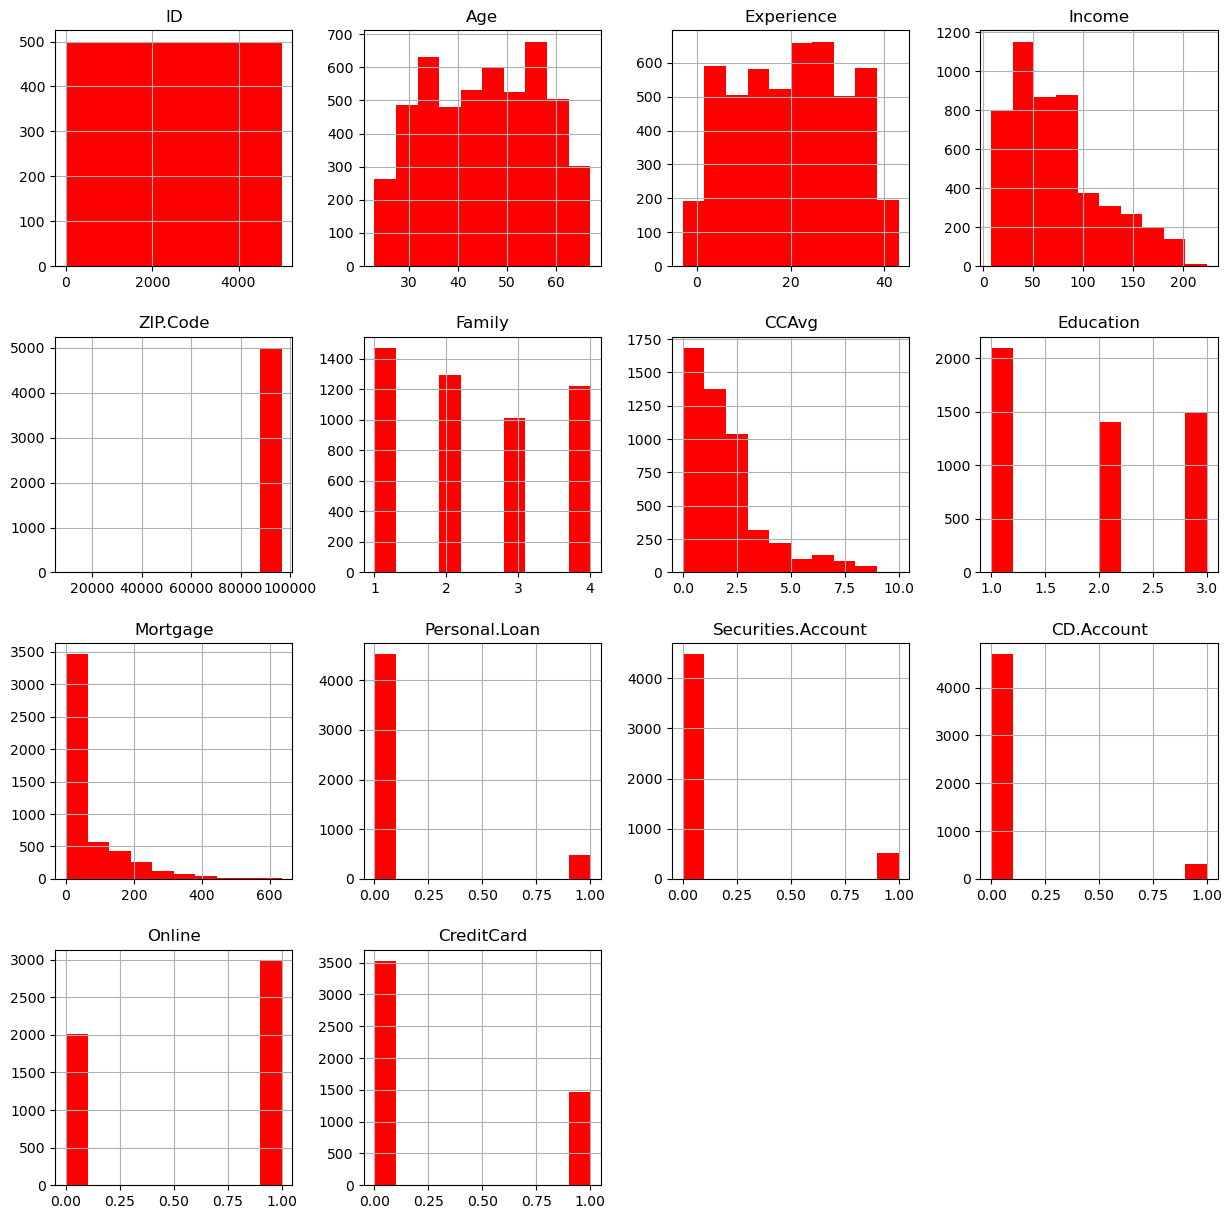

In [17]:
dataset.hist(figsize=(15,15),color = 'red')
plt.show()

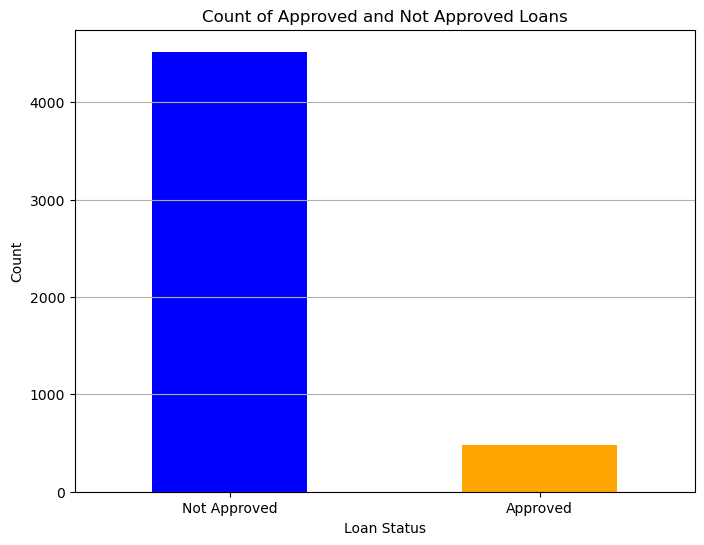

In [18]:
loan_counts = dataset['Personal.Loan'].value_counts()
loan_counts
plt.figure(figsize=(8, 6))
loan_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Approved and Not Approved Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'], rotation=0)
plt.grid(axis='y')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


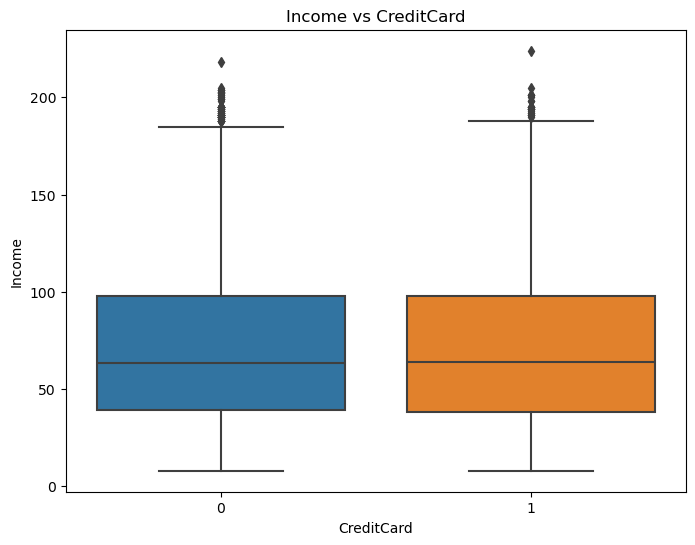

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CreditCard', y='Income', data=dataset)
plt.title('Income vs CreditCard')
plt.xlabel('CreditCard')
plt.ylabel('Income')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


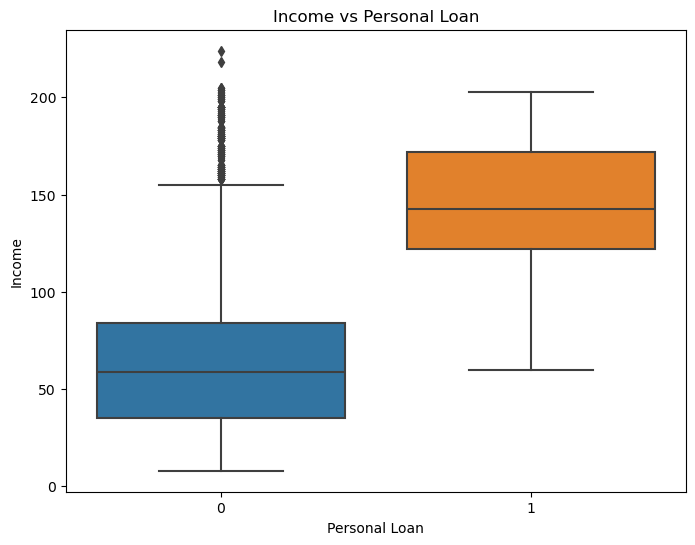

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal.Loan', y='Income', data=dataset)
plt.title('Income vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.show()